# Basisversion neuronales Netz

Im folgenden Jupyter Notebook wird auf die vorliegende "Basisversion" des neuronalen Netzes und dessen Ergebnisse eingegangen. In dem weiteren Jupyter Notebook **(neural_network_Moritz_Kramer_optimized_version.ipynb)** ist das auf die **Genaugigkeit (accuracy)** optimierte neuronale Netz aufgeführt. Die ausführlichere Dokumentation ist in **neural_network_Moritz_Kramer_Doku.PDF** zu finden.

## Vorbereitungen

In den nächsten Codeblöcken werden die für den spätern Verlauf benötigten Packages importiert.

In [1]:
pip install matplotlib

Looking in indexes: https://repo-manager.cloud.zf-world.com/artifactory/api/pypi/pythonhosted_files-pypi-remote/simple
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Looking in indexes: https://repo-manager.cloud.zf-world.com/artifactory/api/pypi/pythonhosted_files-pypi-remote/simple
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

Looking in indexes: https://repo-manager.cloud.zf-world.com/artifactory/api/pypi/pythonhosted_files-pypi-remote/simple
Note: you may need to restart the kernel to use updated packages.


In [4]:
import checker
import generator

from IPython.display import display, clear_output
import numpy as np
import time
import math
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

import importlib
importlib.reload(checker)
importlib.reload(generator)

<module 'generator' from 'C:\\Users\\Z0125415\\Bildverarbeitung_JupyterLab\\neural_network_Moritz_Kramer_basic_version\\generator.py'>

In [5]:
import tensorflow as tf

## MNIST-Datensatz

Der MNIST-Datensatz liefert die für das Training und Testen benötigten Daten. Hierbei wird mit 60 000 Bildern trainiert und mit weiteren 10 000 Bildern getestet.

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)

 Plot of the first 25 samples in the MNIST training set


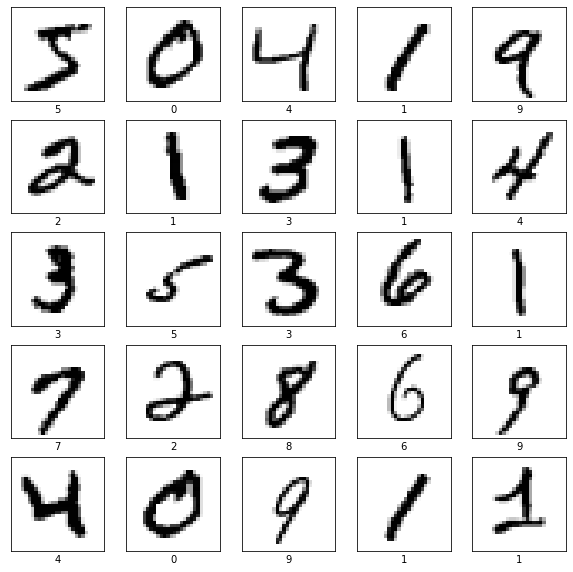

In [6]:
# Loading the MNIST dataset in one line
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Printing the shape
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

# Plotting data samples
print('\n Plot of the first 25 samples in the MNIST training set')
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [7]:
x_train_normalized = x_train/255 
x_test_normalized = x_test/255

# in the next step, we also need to reshape our input to fit our input layer later on. 
# This is due to keras expecting a definition for how many channels your input sample has, as we 
# deal with gray scale this is 1.
x_train= x_train_normalized.reshape(-1, 28, 28, 1)
x_test = x_test_normalized.reshape(-1, 28, 28, 1)

In [8]:
checker.test_normalize(x_train, x_train_normalized)

Normalization worked out well, you are ready to go.


## Netzarchitektur

Die in der Basisversion implementierte Netzarchitektur stellt ein sequentielles Modell mit drei verschiedenen Layern dar. Lediglich mit einem Flatten-, Dense- und Dropout-Layer. Diese Architektur soll als eine Grundlage zur weiteren Optimierung des Netzes dienen.

In [9]:
# This is the moment where you define your model's architecture

marvin = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28,1 )),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
])

marvin.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
Total params: 100,480
Trainable params: 100,480
Non-trainable params: 0
_________________________________________________________________


## Design des Trainings

In [10]:
# Define your loss
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


print(-tf.math.log(1/10))

sampleID = 100
loss_fn(y_train[:1], marvin(x_train[sampleID-1:sampleID]).numpy()).numpy()

tf.Tensor(2.3025851, shape=(), dtype=float32)


4.964876

In [11]:
# Compiling basically means to prepare the training routine for your model which consists of the optimizer, 
# the loss, and the metrics which are to be reported during training

marvin.compile(optimizer='adam',
              loss= loss_fn ,
              metrics=['accuracy'])

## Training

Das Modell trainiert hier 50 Epochen mit einer Batch-Size von 516.

In [12]:
# get ready for your first training run.

marvin.fit(
    x_train,
    y_train,
    epochs= 50,
    batch_size= 516,
    validation_data=(x_test, y_test)
    # callbacks=[tensorboard_callback]
)

Epoch 1/50
117/117 [==============================] - 5s 27ms/step - loss: 2.5892 - accuracy: 0.5288 - val_loss: 1.1497 - val_accuracy: 0.8542
Epoch 2/50
117/117 [==============================] - 2s 18ms/step - loss: 1.6559 - accuracy: 0.7056 - val_loss: 0.8532 - val_accuracy: 0.8825
Epoch 3/50
117/117 [==============================] - 2s 18ms/step - loss: 1.5342 - accuracy: 0.7194 - val_loss: 0.7404 - val_accuracy: 0.8954
Epoch 4/50
117/117 [==============================] - 2s 18ms/step - loss: 1.4834 - accuracy: 0.7245 - val_loss: 0.6732 - val_accuracy: 0.9040
Epoch 5/50
117/117 [==============================] - 2s 18ms/step - loss: 1.4505 - accuracy: 0.7290 - val_loss: 0.6338 - val_accuracy: 0.9071
Epoch 6/50
117/117 [==============================] - 2s 18ms/step - loss: 1.4383 - accuracy: 0.7299 - val_loss: 0.6069 - val_accuracy: 0.9107
Epoch 7/50
117/117 [==============================] - 2s 18ms/step - loss: 1.4016 - accuracy: 0.7366 - val_loss: 0.5833 - val_accuracy: 0.9137

In [13]:
# after the training finishes, we will also save Marvin in Keras style (HDF5), so we do not have to 
# train him again
# every time we start our computer. Obviously, by changing the model_name, you can also save different
# configurations of Marvin. The name has to be a string, like this: 'name.h5'
model_name = 'marvin.h5'
marvin.save(model_name, save_format='h5')

# It is best practice to indicate what configuration changes you did within the name, so you know
# which model you need to load already from its name
# Let's say instead of a learning rate of 0.001 you used 0.1, your naming could then look like:
# 'marvin_lr01.h5'

print('Success! You saved Marvin as: ', model_name)

Success! You saved Marvin as:  marvin.h5


## Auswertung

Nun wird die gewünschte Konfiguration des Modells geladen und mit den Testdaten auf seine Performance evaluiert. Die Ergebnisse bezüglich des **Loss** und der **Accuracy** werden nach Ausführung des Jupyter Notebooks unter dem fogenden Codeblock ausgegeben. Im weiteren Verlauf sind grafische Auswertungen des Ergebnisses zu sehen.

In [14]:
# load a saved marvin configuration you want to evaluate
model_name = 'marvin.h5' 
marvin_reloaded = tf.keras.models.load_model(model_name)

# Let Marvin predict on the test set, so we have some data to evaluate his performance.
predictions = marvin_reloaded.predict([x_test])

# Remember that the prediction of Marvin is a probability distribution over all ten-digit classes
# We want him to assign the digit class with the highest probability to the sample.
predictions = np.argmax(predictions, axis=1)
#pd.DataFrame(predictions)


(test_loss, test_acc) = marvin_reloaded.evaluate(x_test, y_test)
print("Loss: ", test_loss)
print("Accuracy: ",test_acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.4546 - accuracy: 0.9258
Loss:  0.4545862674713135
Accuracy:  0.9258000254631042


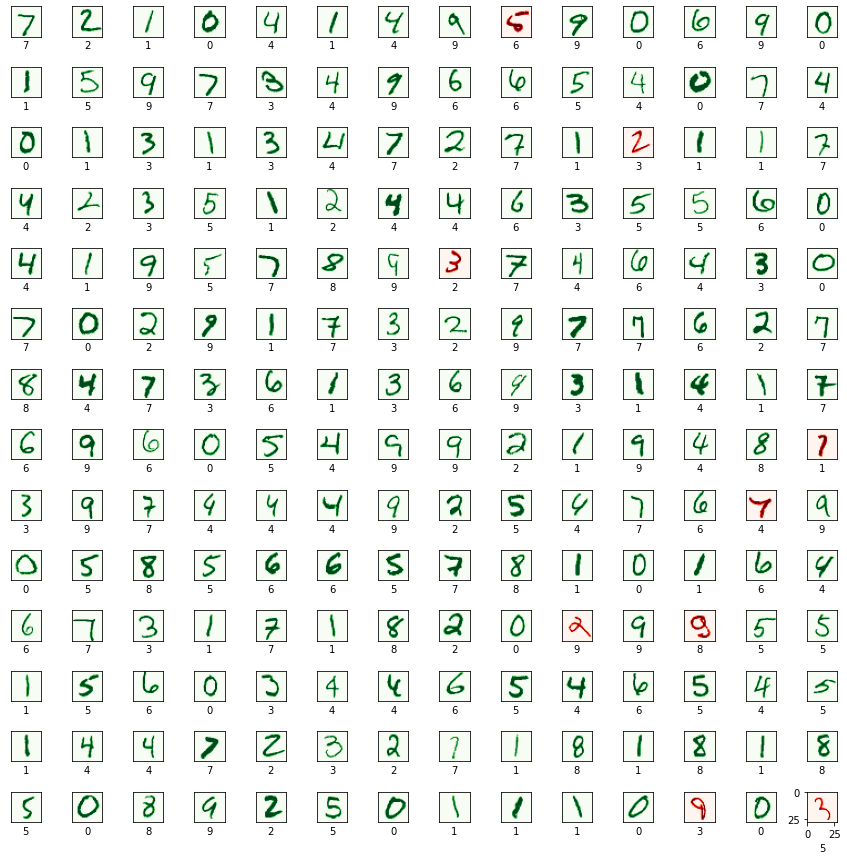

In [15]:
# Plot for the intuitive approach

numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index].reshape((28, 28)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

### Confusion Matrix

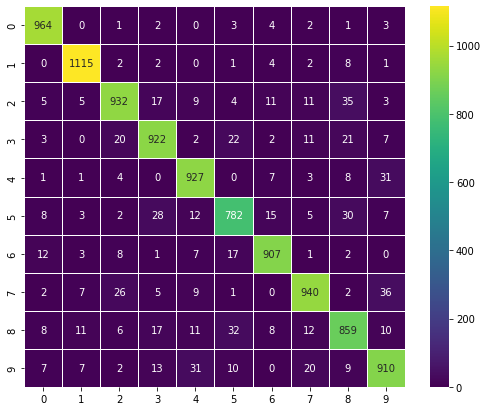

In [16]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)

f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.7,
    fmt="d",
    square=True,
    ax=ax,
    cmap="viridis",
)
plt.show()

## Abhängigkeiten

In [17]:
!pip install watermark -q

In [18]:
%load_ext watermark
%watermark -v -m -p checker,generator,display,clear_output,numpy,time,math,matplotlib,seaborn,pandas,importlib,tensorflow,watermark
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.9.10
IPython version      : 7.32.0

checker     : unknown
generator   : unknown
display     : not installed
clear_output: not installed
numpy       : 1.21.5
time        : unknown
math        : unknown
matplotlib  : 3.5.1
seaborn     : 0.11.2
pandas      : 1.4.1
importlib   : unknown
tensorflow  : 2.8.0
watermark   : 2.4.3

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
CPU cores   : 8
Architecture: 64bit

Last updated: Thu Jan 04 2024 16:25:42Mitteleuropäische Zeit

